# 第8章　用scikit-learn库实现机器学习　　205
# 8.1　scikit-learn库　　205
# 8.2　机器学习　　205
## 8.2.1　有监督和无监督学习　　205
## 8.2.2　训练集和测试集　　206
# 8.3　用scikit-learn实现有监督学习　　206
# 8.4　Iris数据集　　206


In [16]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.data[:5])
print()
print(iris.target[:5])
print()
print(iris.target_names)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0]

['setosa' 'versicolor' 'virginica']


([], <a list of 0 Text yticklabel objects>)

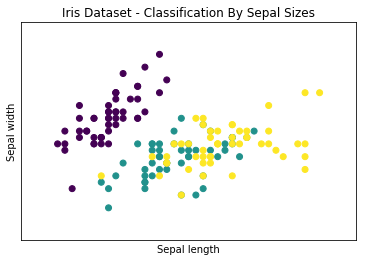

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
% matplotlib inline

iris = datasets.load_iris()
x = iris.data[:,0] #X-Axis - sepal length
y = iris.data[:,1] #Y-Axis - sepal length
species = iris.target #Species

x_min, x_max = x.min() - .5,x.max() + .5
y_min, y_max = y.min() - .5,y.max() + .5

#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Sepal Sizes')
plt.scatter(x,y, c=species)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

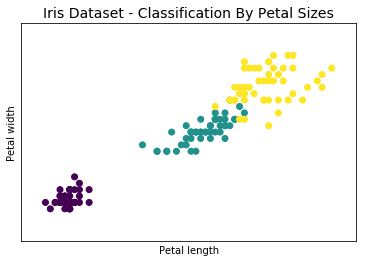

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:,2] #X-Axis - petal length
y = iris.data[:,3] #Y-Axis - petal length
species = iris.target #Species

x_min, x_max = x.min() - .5,x.max() + .5
y_min, y_max = y.min() - .5,y.max() + .5

#SCATTERPLOT
plt.figure()
plt.title('Iris Dataset - Classification By Petal Sizes', size=14)
plt.scatter(x,y, c=species)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


### 主成分分解

[]

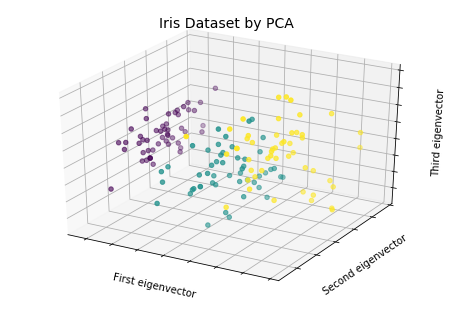

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
x = iris.data[:,1] #X-Axis - petal length
y = iris.data[:,2] #Y-Axis - petal length
species = iris.target #Species
x_reduced = PCA(n_components=3).fit_transform(iris.data)

#SCATTERPLOT 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size=14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2], c=species)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())


# 8.5　K-近邻分类器　　211

In [26]:
import numpy as np
from sklearn import datasets
np.random.seed(0)
iris = datasets.load_iris()
x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data))
x_train = x[i[:-10]]
y_train = y[i[:-10]]
x_test = x[i[-10:]]
y_test = y[i[-10:]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pre = knn.predict(x_test)
print(y_pre)
print(y_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


(1.5, 4.900000000000003)

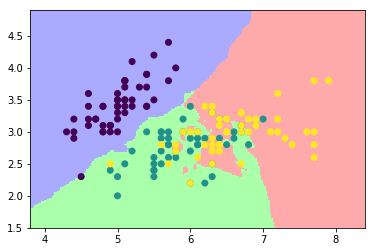

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
x = iris.data[:,:2] #X-Axis - sepal length-width
y = iris.target #Y-Axis - species
x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

(-0.4, 2.980000000000003)

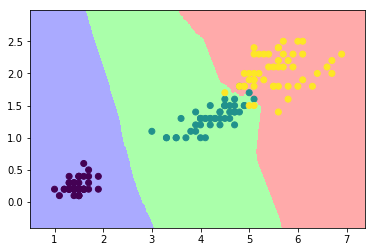

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
x = iris.data[:,2:4] #X-Axis - petals length-width
y = iris.target #Y-Axis - species
x_min, x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5,x[:,1].max() + .5
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

# 8.6　Diabetes数据集　　214

In [29]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [31]:
np.sum(diabetes.data[:,0]**2)

1.0000000000000746

In [33]:
diabetes.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

# 8.7　线性回归：最小平方回归　　215

In [34]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]
linreg.fit(x_train,y_train)

linreg.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [36]:
y_pre = linreg.predict(x_test)
print(y_pre)
print(y_test)

[197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [37]:
linreg.score(x_test, y_test)

0.5850753022690571

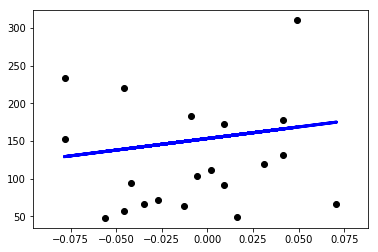

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]
x0_test = x_test[:,0]
x0_train = x_train[:,0]
x0_test = x0_test[:,np.newaxis]
x0_train = x0_train[:,np.newaxis]
linreg = linear_model.LinearRegression()
linreg.fit(x0_train,y_train)
y = linreg.predict(x0_test)
plt.scatter(x0_test,y_test,color='k')
plt.plot(x0_test,y,color='b',linewidth=3)

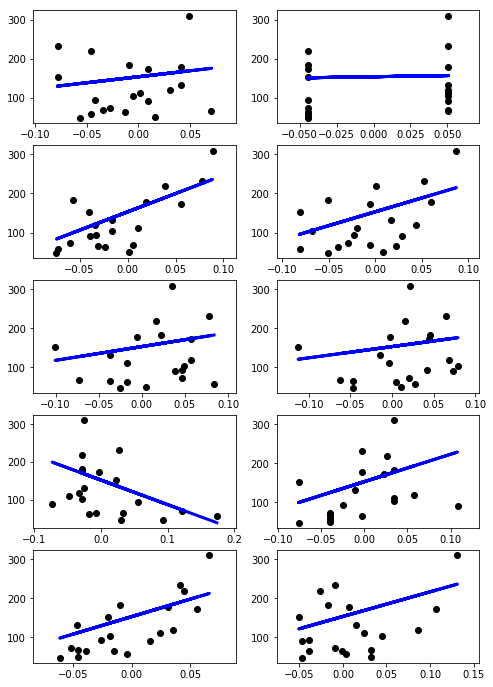

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]
plt.figure(figsize=(8,12))
for f in range(0,10):
    xi_test = x_test[:,f]
    xi_train = x_train[:,f]
    xi_test = xi_test[:,np.newaxis]
    xi_train = xi_train[:,np.newaxis]
    linreg.fit(xi_train,y_train)
    y = linreg.predict(xi_test)
    plt.subplot(5,2,f+1)
    plt.scatter(xi_test,y_test,color='k')
    plt.plot(xi_test,y,color='b',linewidth=3)

# 8.8　支持向量机　　219
## 8.8.1　支持向量分类　　219

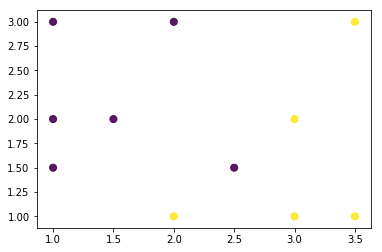

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

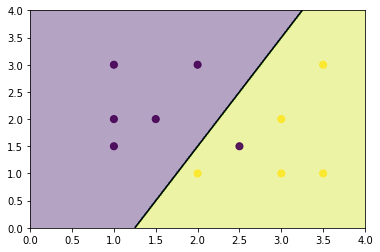

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear').fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

In [54]:
svc.predict([[1.5,2.5]])

array([0])

In [55]:
svc.predict([[2.5,1]])

array([1])

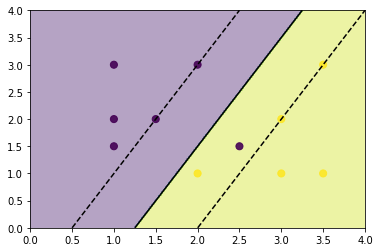

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear',C=1).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

## 8.8.2　非线性SVC　　223

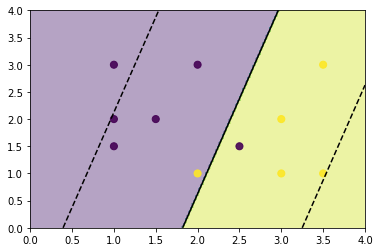

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='linear',C=0.1).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

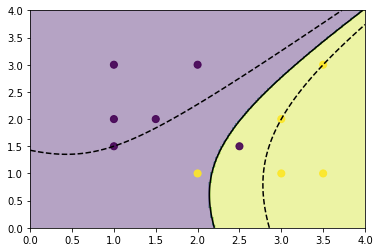

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='poly',C=1, degree=3).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

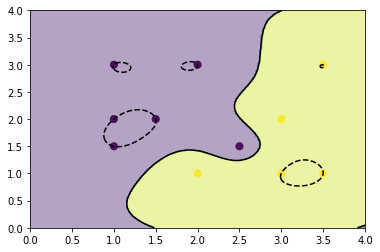

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],
[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])
y = [0]*6 + [1]*5
svc = svm.SVC(kernel='rbf', C=1, gamma=3).fit(x,y)
X,Y = np.mgrid[0:4:200j,0:4:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.9)

## 8.8.3　绘制SVM分类器对Iris数据集的分类效果图　　225

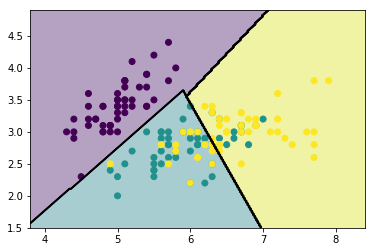

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .05
svc = svm.SVC(kernel='linear',C=1.0).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .02
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

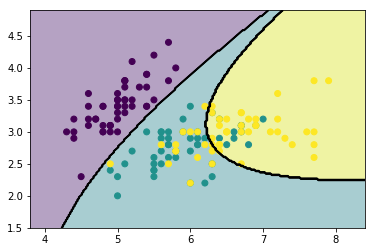

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .05
svc = svm.SVC(kernel='poly',C=1.0,degree=3).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .02
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

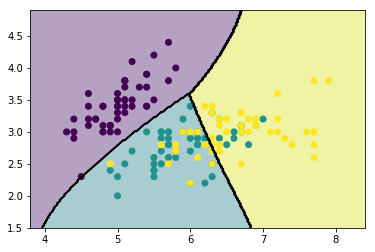

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target
h = .05
svc = svm.SVC(kernel='rbf',C=1.0,degree=3).fit(x,y)
x_min,x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5, x[:,1].max() + .5
h = .02
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,Z,colors='k')
plt.scatter(x[:,0],x[:,1],c=y)

## 8.8.4　支持向量回归　　227

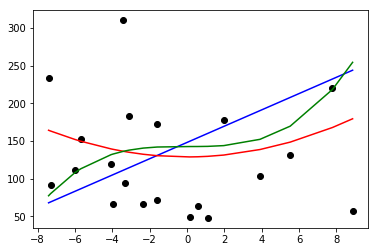

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
diabetes = datasets.load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]
x0_test = x_test[:,2]
x0_train = x_train[:,2]
x0_test = x0_test[:,np.newaxis]
x0_train = x0_train[:,np.newaxis]

x0_test.sort(axis=0)
x0_test = x0_test*100
x0_train = x0_train*100
svr = svm.SVR(kernel='linear',C=1000)
svr2 = svm.SVR(kernel='poly',C=1000,degree=2)
svr3 = svm.SVR(kernel='poly',C=1000,degree=3)
svr.fit(x0_train,y_train)
svr2.fit(x0_train,y_train)
svr3.fit(x0_train,y_train)
y = svr.predict(x0_test)
y2 = svr2.predict(x0_test)
y3 = svr3.predict(x0_test)
plt.scatter(x0_test,y_test,color='k')
plt.plot(x0_test,y,color='b')
plt.plot(x0_test,y2,c='r')
plt.plot(x0_test,y3,c='g')


# 8.9　小结　　229